In [1]:
%pylab inline

from astroquery.gaia import Gaia
from astropy.io import fits
import pandas as pd

Populating the interactive namespace from numpy and matplotlib
Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
du_table = {
    # HVS candidates from Du et al.
    # First dict entry is r_gc (kpc), second is v_gc (km/s).
    6698855754225352192: (6.44, 717),
    3593446274383096448: (8.77, 734),
    4119670443586493184: (7.93, 670),
    1842456376310935552: (7.87, 824),
    4396109004117478656: (7.81, 728),
    4912074832815572224: (8.14, 756),
    4119759641435130624: (7.96, 663),
    4065092915465740160: (8.03, 621),
    2946665465655257472: (10.65, 810),
    4467323685050696960: (6.39, 819),
    3841458366321558656: (9.77, 840),
    2655054950237153664: (8.07, 621),
    4062943374550066560: (8.09, 589),
    4121504428896960640: (8.08, 648),
    2047267531138612864: (7.78, 748),
    4050754184394584192: (7.92, 656),
    2525871954701579904: (8.34, 636),
    3685380427311132160: (7.91, 761),
    4050705707044344832: (7.96, 685),
    4052470217026086144: (8.0, 772),
    4055741088022263680: (7.51, 751),
    4057367235624058240: (8.0, 711),
    4062949009547937152: (7.71, 708),
    4063041295654767488: (7.91, 1142),
    4063270135632421888: (7.96, 751),
    4068950625022563584: (8.14, 611),
    1820931585123817728: (7.3, 1319),
    6097052289696317952: (6.0, 1407),
}

du_ids = [str(id) for id in du_table.keys()]

In [3]:
#data = Gaia.load_data([str(id) for id in source_ids], retrieval_type='source_id')

query = "SELECT * FROM gaiadr2.gaia_source WHERE source_id IN ({})".format(','.join(du_ids))
print(query)

job = Gaia.launch_job(query)

SELECT * FROM gaiadr2.gaia_source WHERE source_id IN (1842456376310935552,3593446274383096448,6698855754225352192,4063270135632421888,4050705707044344832,3841458366321558656,4052470217026086144,4912074832815572224,4065092915465740160,4062943374550066560,6097052289696317952,3685380427311132160,2525871954701579904,4121504428896960640,4055741088022263680,4396109004117478656,4062949009547937152,4050754184394584192,4467323685050696960,2946665465655257472,4068950625022563584,4063041295654767488,1820931585123817728,2047267531138612864,2655054950237153664,4119670443586493184,4057367235624058240,4119759641435130624)


In [4]:
data = job.get_results()
data['source_id'] = data['source_id'].astype(int)
data = data.to_pandas()

# Augment the data with galactic center distances and velocities.

data['gc_radius_corrected'] = 0
data['gc_velocity_corrected'] = 0

for source_id in du_table:
    data.loc[data.source_id == source_id, 'gc_radius_corrected'] = du_table[source_id][0]
    data.loc[data.source_id == source_id, 'gc_velocity_corrected'] = du_table[source_id][1]

In [5]:
data.columns

Index(['solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch',
       'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error',
       'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr',
       'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr',
       'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr',
       'astrometric_n_obs_al', 'astrometric_n_obs_ac',
       'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al',
       'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_params_solved',
       'astrometric_primary_flag', 'astrometric_weight_al',
       'astrometric_pseudo_colour', 'astrometric_pseudo_colour_error',
       'mean_varpi_factor_al', 'astrometric_matched_observations',
       'visibility_periods_used', 'astrometric_sigma5d_max',
       'frame_rotator_object_type',

In [6]:
data['gc_radius_corrected']

0      7.30
1      7.87
2      7.78
3      8.34
4      8.07
5     10.65
6      8.77
7      7.91
8      9.77
9      7.96
10     7.92
11     8.00
12     7.51
13     8.00
14     8.09
15     7.71
16     7.91
17     7.96
18     8.03
19     8.14
20     7.93
21     7.96
22     8.08
23     7.81
24     6.39
25     8.14
26     6.00
27     6.44
Name: gc_radius_corrected, dtype: float64

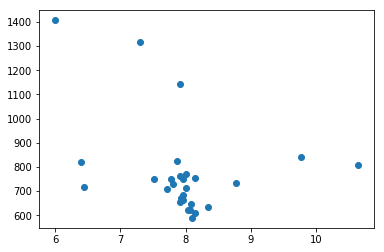

In [7]:
plt.scatter(data['gc_radius_corrected'], data['gc_velocity_corrected'])